In [ ]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn import preprocessing
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm #Linear Regression
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dry_Bean.csv')

In [ ]:
#Reading Dataset
df['Class'].unique()
df.info()

#duplicate values
df[df.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
5505,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5509,33954,716.750,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5548,38427,756.323,306.533886,160.591784,1.908777,0.851782,38773,221.193978,0.796976,0.991076,0.844174,0.721597,0.007977,0.001334,0.520702,0.993905,HOROZ
5554,38891,791.343,319.499996,156.869619,2.036723,0.871168,39651,222.525412,0.650025,0.980833,0.780422,0.696480,0.008215,0.001192,0.485085,0.987983,HOROZ
5599,40804,790.802,323.475648,163.287717,1.981016,0.863241,41636,227.932592,0.787570,0.980017,0.819931,0.704636,0.007928,0.001206,0.496512,0.983598,HOROZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7263,63408,1005.966,412.551649,196.337705,2.101235,0.879494,64200,284.136540,0.798791,0.987664,0.787385,0.688730,0.006506,0.000903,0.474348,0.996718,HOROZ
7278,63882,1004.206,411.263403,198.765453,2.069089,0.875452,64663,285.196579,0.754705,0.987922,0.796054,0.693465,0.006438,0.000918,0.480893,0.995010,HOROZ
7285,63948,996.497,412.297178,198.877557,2.073121,0.875971,64641,285.343867,0.777909,0.989279,0.809254,0.692083,0.006447,0.000912,0.478979,0.992981,HOROZ
7340,65766,1035.842,406.416622,207.242369,1.961069,0.860218,66698,289.371512,0.792295,0.986027,0.770237,0.712007,0.006180,0.000980,0.506954,0.994172,HOROZ


In [ ]:
df.describe(percentiles=[.25, .5, .75, 0.995])

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
99.5%,200711.400000,1716.395500,651.184245,401.341128,2.247550,0.895566,203371.050000,505.523186,0.831485,0.993305,0.976516,0.945360,0.009023,0.003153,0.893705,0.999460
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


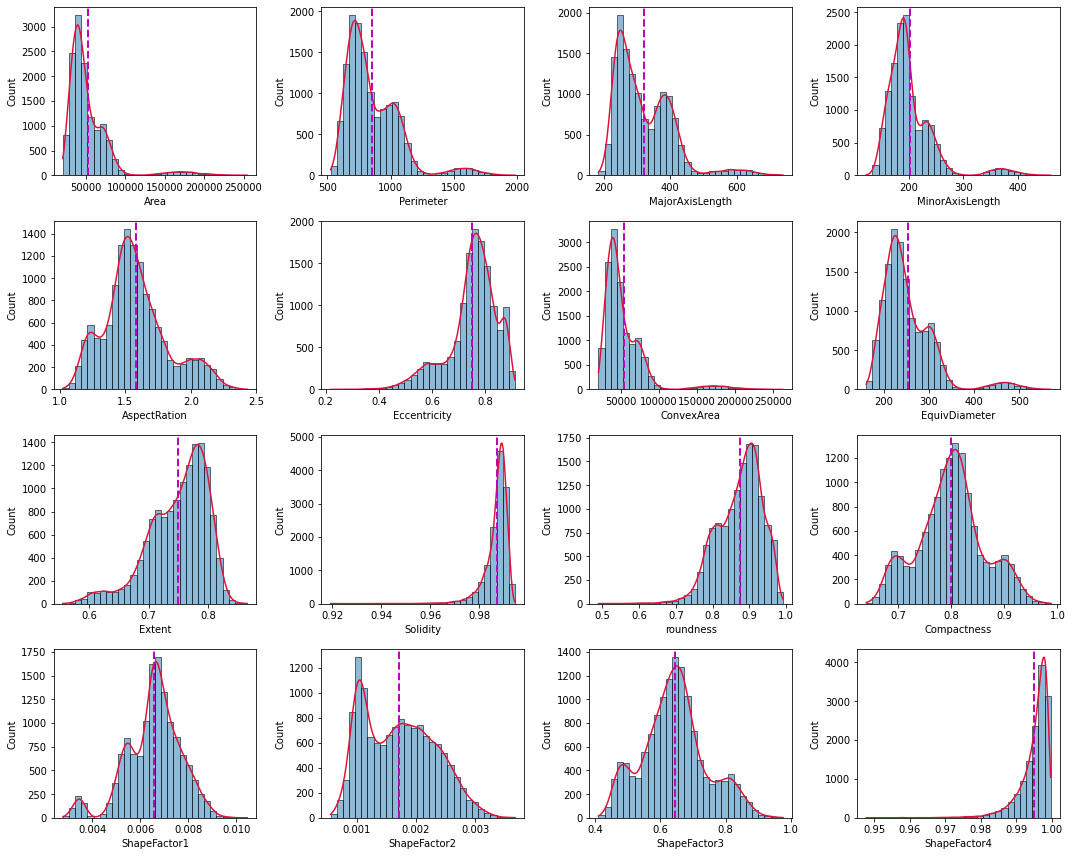

In [ ]:
#Histogram
Numeric_cols = df.drop(columns=['Class']).columns
fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(df[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=df[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()    

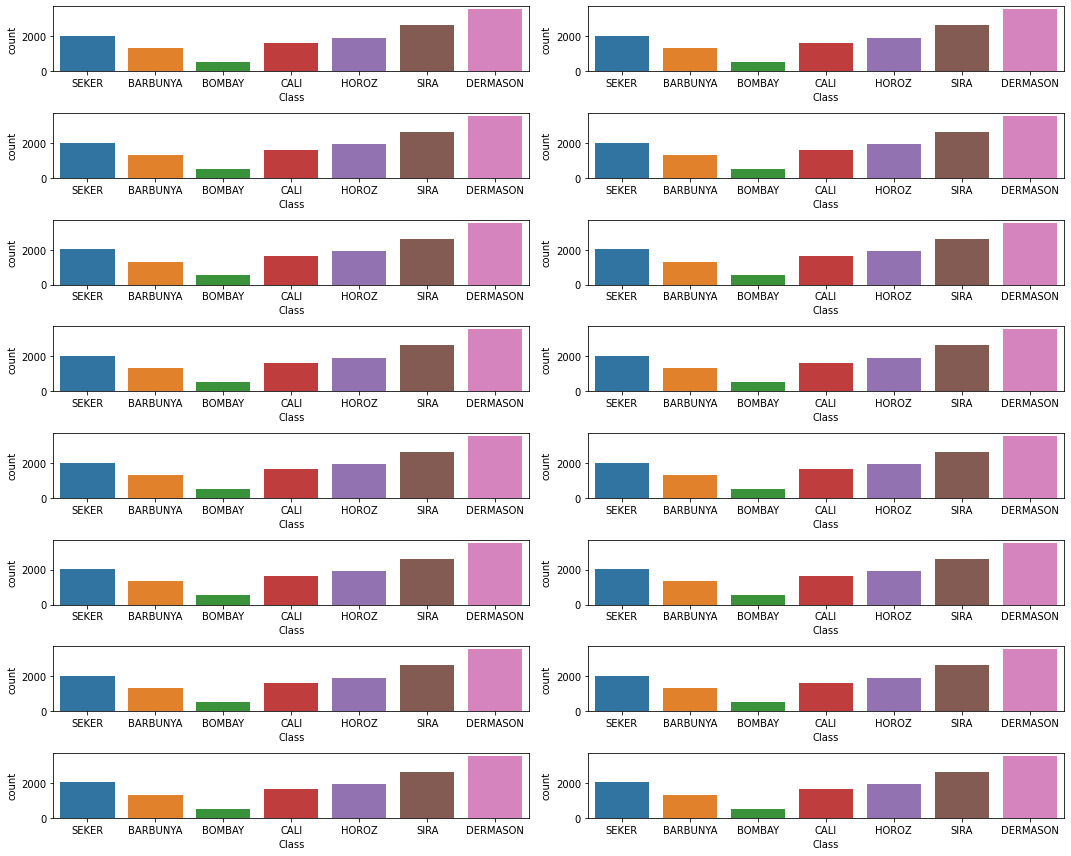

In [ ]:
#Count Plot
Numeric_cols = df.drop(columns=['Class']).columns
fig, ax = plt.subplots(8, 2, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.countplot(df['Class'], ax=subplot)
plt.tight_layout()  

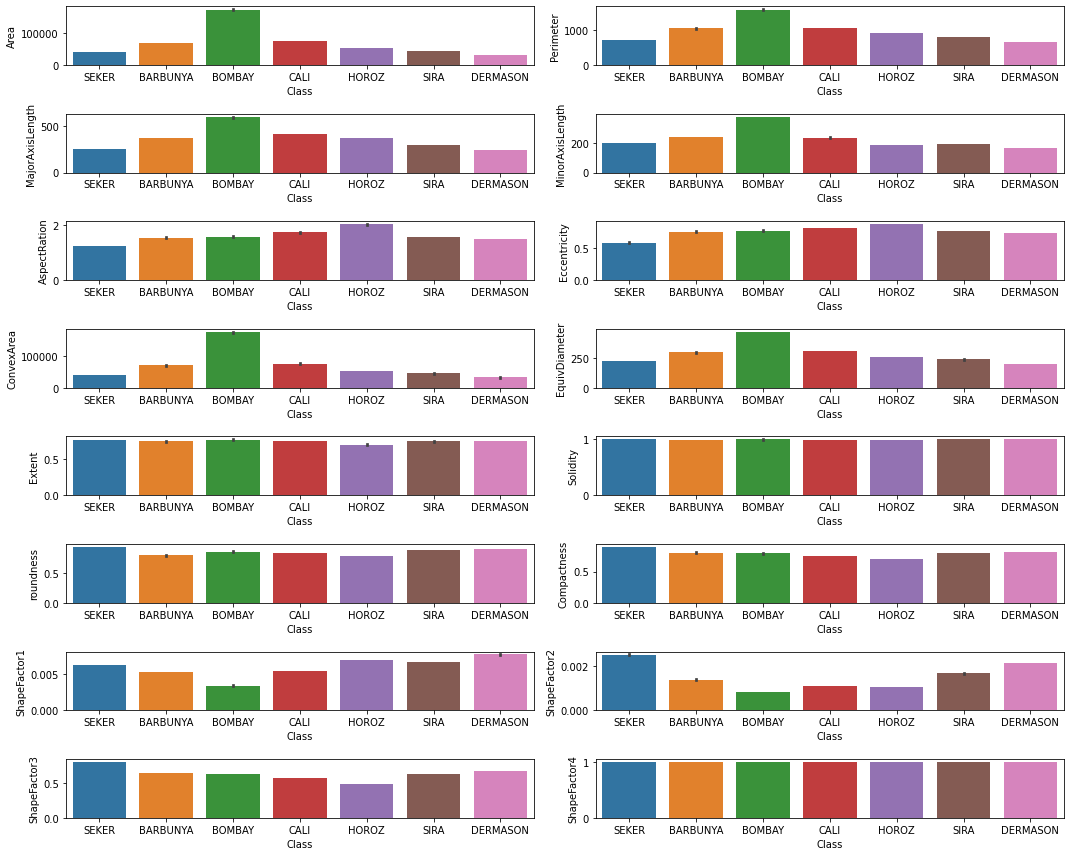

In [ ]:
#Bar Plot
Numeric_cols = df.drop(columns=['Class']).columns
fig, ax = plt.subplots(8, 2, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.barplot(y = df[variable],x = df['Class'], ax=subplot)
plt.tight_layout()    

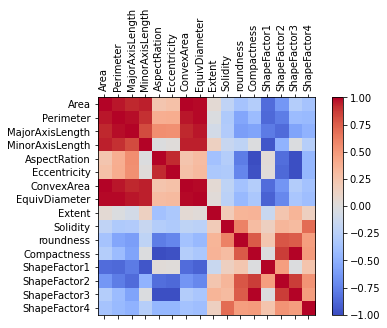

In [ ]:
#Correlation 
Numeric_cols = df.drop(columns=['Class']).columns
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(corr, cmap = 'coolwarm',vmin=-1,vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0,len(Numeric_cols),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Numeric_cols)
ax.set_yticklabels(Numeric_cols)
plt.show()

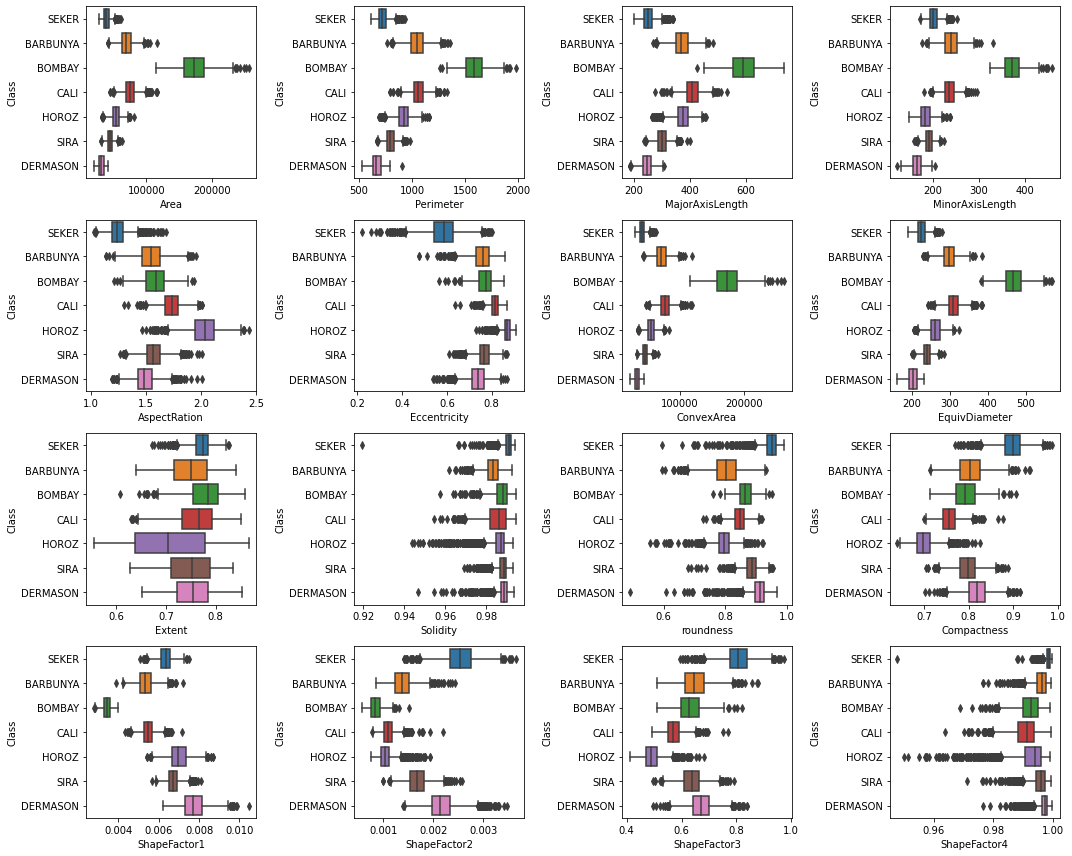

In [ ]:
Numeric_cols = df.drop(columns=['Class']).columns
fig, ax = plt.subplots(4, 4, figsize=(15, 12))
x = df[variable]
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.boxplot(df[variable],df['Class'], ax=subplot)
plt.tight_layout()  

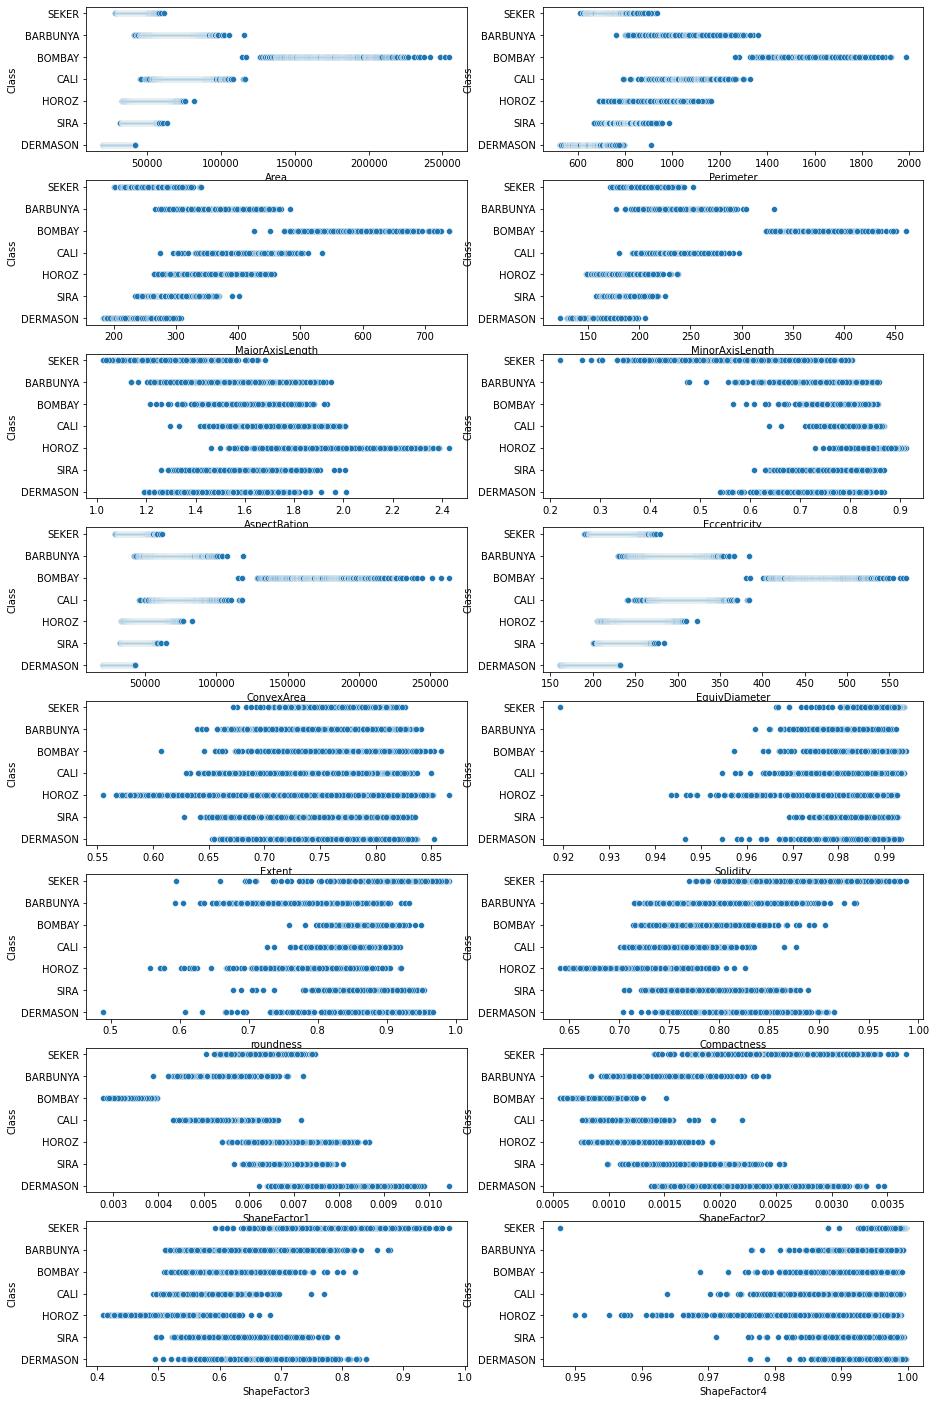

In [ ]:
Numeric_cols = df.drop(columns=['Class']).columns
fig, ax = plt.subplots(8, 2, figsize=(15, 25))
for variable,scatterplot in zip(Numeric_cols,ax.flatten()):
  sns.scatterplot(df[variable],df['Class'], ax = scatterplot)
plt.show()  


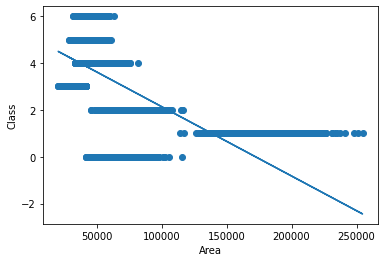

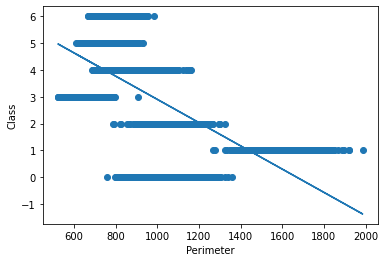

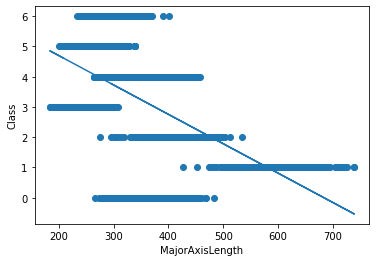

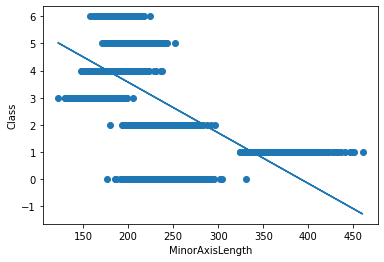

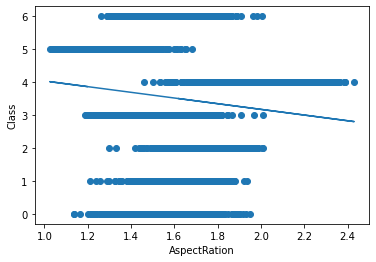

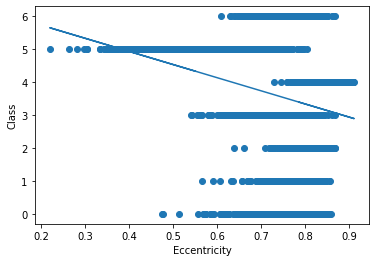

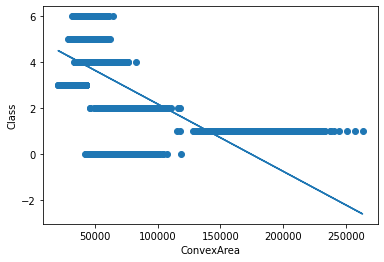

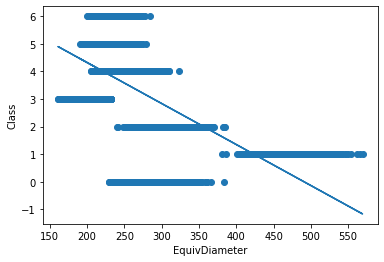

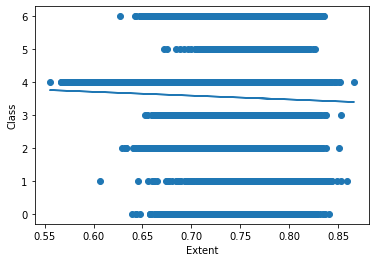

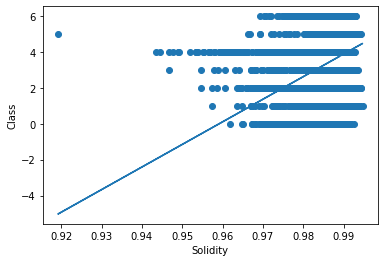

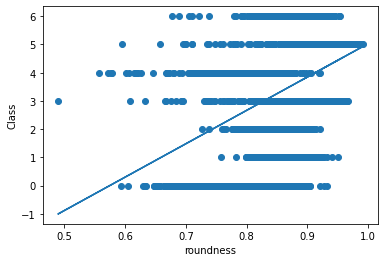

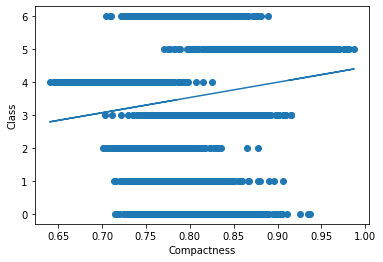

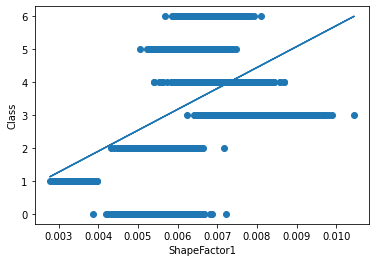

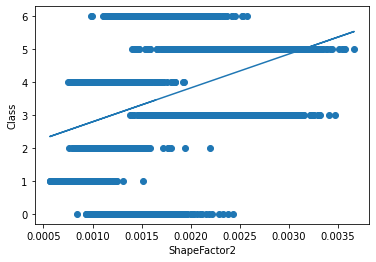

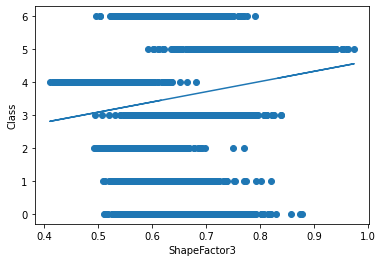

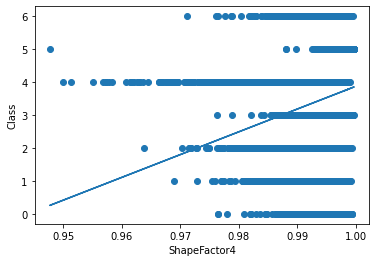

<Figure size 432x288 with 0 Axes>

In [ ]:
#Linear Regression
Numeric_cols = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']

for variable in (Numeric_cols):
  x = df[variable]
  y = df['Class']

  slope, intercept, r, p, std_err = stats.linregress(x, y)

  def myfunc(x):
    return slope * x + intercept

  mymodel = list(map(myfunc, x))
  
  plt.scatter(x, y)
  plt.plot(x, mymodel)
  plt.xlabel(variable)
  plt.ylabel('Class')
  plt.show()
plt.tight_layout()

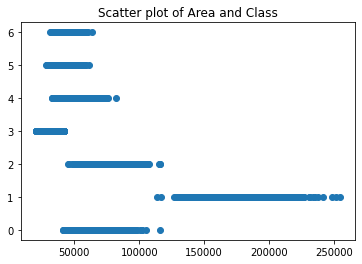

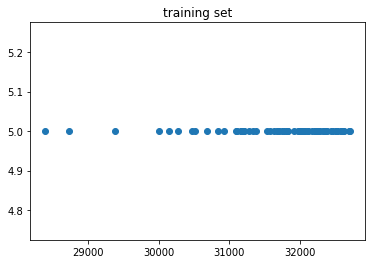

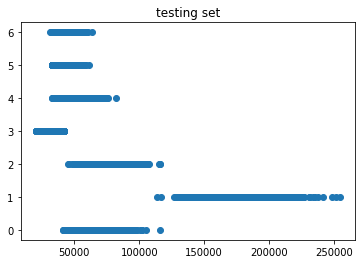

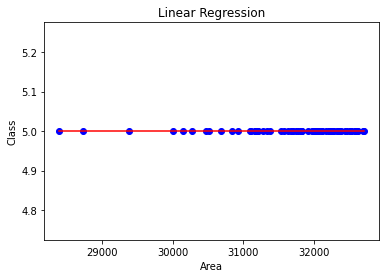

1.0
-0.6493713388645137


In [ ]:
#testing model using test and train
x = np.array(df['Area'])
x  = x.reshape(-1, 1)

label_encoder = preprocessing.LabelEncoder()
df['Class']= label_encoder.fit_transform(df['Class'])
df['Class'].unique()
y = df['Class']

plt.scatter(x, y)
plt.title('Scatter plot of Area and Class')
plt.show()

#splitting data to train the model
train_x = x[:70]
train_y = y[:70]

#splitting data to test the model
test_x = x[70:]
test_y = y[70:]

#display training set
plt.scatter(train_x, train_y)
plt.title('training set')
plt.show()

#display testing set
plt.scatter(test_x, test_y)
plt.title('testing set')
plt.show()

model = LinearRegression()
model.fit(train_x, train_y)

plt.scatter(train_x, train_y, color = 'blue')
  
plt.plot(train_x, model.predict(train_x), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Area')
plt.ylabel('Class')
plt.show()

model = LinearRegression().fit(train_x, train_y)
r_sq = model.score(train_x, train_y)
print(r_sq)
r_sq_test = model.score(test_x, test_y)
print(r_sq_test)